# **Proyek Pertama : Membuat Model NLP dengan TensorFlow**

* Nama : Firman Nurcahyo
* Email : firman.cahyo.369@gmail.com
* ID DiCoding : Firman Nurcahyo

# **Mengimport Modul Yang Diperlukan**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a DataFrame
news_data = pd.read_csv('bbc-news-data.csv', sep='\t')

# Display the first few rows of the DataFrame
print(news_data.head())

   category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...  


In [3]:
# Display information about the DataFrame
print(news_data.info())

# Display the count of unique values in the 'category' column
category_counts = news_data['category'].value_counts()
print(category_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB
None
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


In [4]:
# Drop the 'filename' column from the DataFrame
news_data = news_data.drop(columns=['filename'])
news_data

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


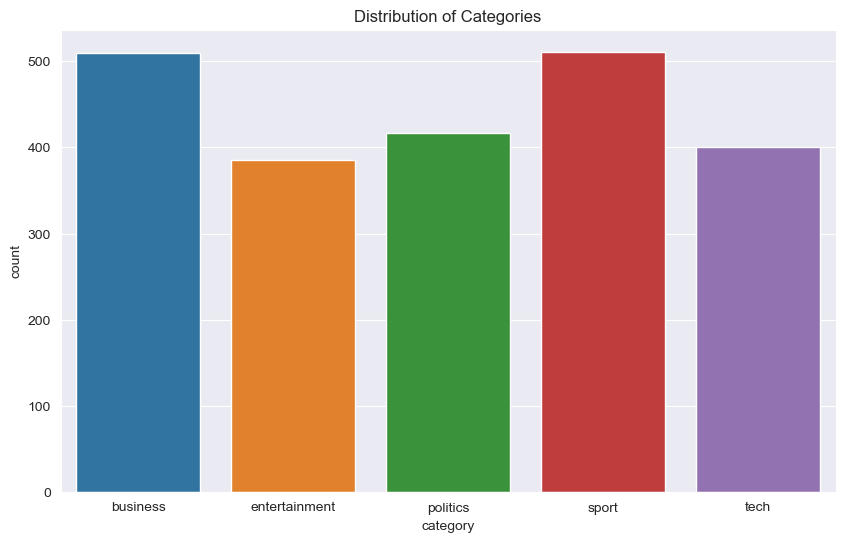

In [5]:
# Set the seaborn style to "darkgrid"
sns.set_style("darkgrid")

# Create a new figure with a specified size
plt.figure(figsize=(10, 6))

# Use seaborn to create a count plot based on the 'category' column
sns.countplot(x='category', data=news_data)

# Set the title of the plot
plt.title('Distribution of Categories')

# Display the plot
plt.show()

In [6]:
# Concatenate 'title' and 'content' columns into a new 'text' column
news_data['text'] = news_data['title'] + " " + news_data['content']
news_data

,category,title,content,text
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit Quarterly p...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech The dollar h...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim The owners ...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits British Air...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq Shares in U...
...,...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,BT program to beat dialler scams BT is introd...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,Spam e-mails tempt net shoppers Computer user...
2222,tech,Be careful how you code,A new European directive could put software w...,Be careful how you code A new European direct...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...,US cyber security chief resigns The man makin...


# **Data Cleaning**

In [7]:
# Import necessary libraries for NLP and machine learning
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import re
import string
import unicodedata
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.preprocessing import text, sequence
import nltk

# Download stopwords data from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\firma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Create a set of English stopwords
stopwords_set = set(stopwords.words('english'))

# Create a list of punctuation
punctuation_list = list(string.punctuation)

# Update the stopwords set to include punctuation
stopwords_set.update(punctuation_list)

In [9]:
# Define and initialize stopwords set
stwd = set(stopwords.words('english'))

# Function to strip HTML tags from text
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to remove text between square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Function to remove URLs from text
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Function to remove stopwords from text
def remove_stopwords(text):
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stwd:
            final_text.append(word.strip())
    return " ".join(final_text)

# Function to denoise text using the defined cleaning functions
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text

# Apply the denoise_text function to the 'text' column of the DataFrame
news_data['text'] = news_data['text'].apply(denoise_text)

In [10]:
# Function to get the corpus (list of words) from a list of texts
def get_corpus(text):
    words = []
    for sentence in text:
        for word in sentence.split():
            words.append(word.strip())
    return words

# Apply the get_corpus function to the 'text' column of the DataFrame
corpus = get_corpus(news_data['text'])

# Display the first 10 words in the corpus
print(corpus[:10])

['Ad', 'sales', 'boost', 'Time', 'Warner', 'profit', 'Quarterly', 'profits', 'US', 'media']


In [11]:
# Import Counter from the collections module
from collections import Counter

# Display the dictionary of the 10 most common words
counter = Counter(corpus)
most_common = dict(counter.most_common(10))
most_common

{'said': 4899,
 '-': 3193,
 'Mr': 2979,
 'would': 2555,
 'also': 2098,
 'people': 1695,
 'said.': 1499,
 'could': 1494,
 'new': 1490,
 'one': 1376}

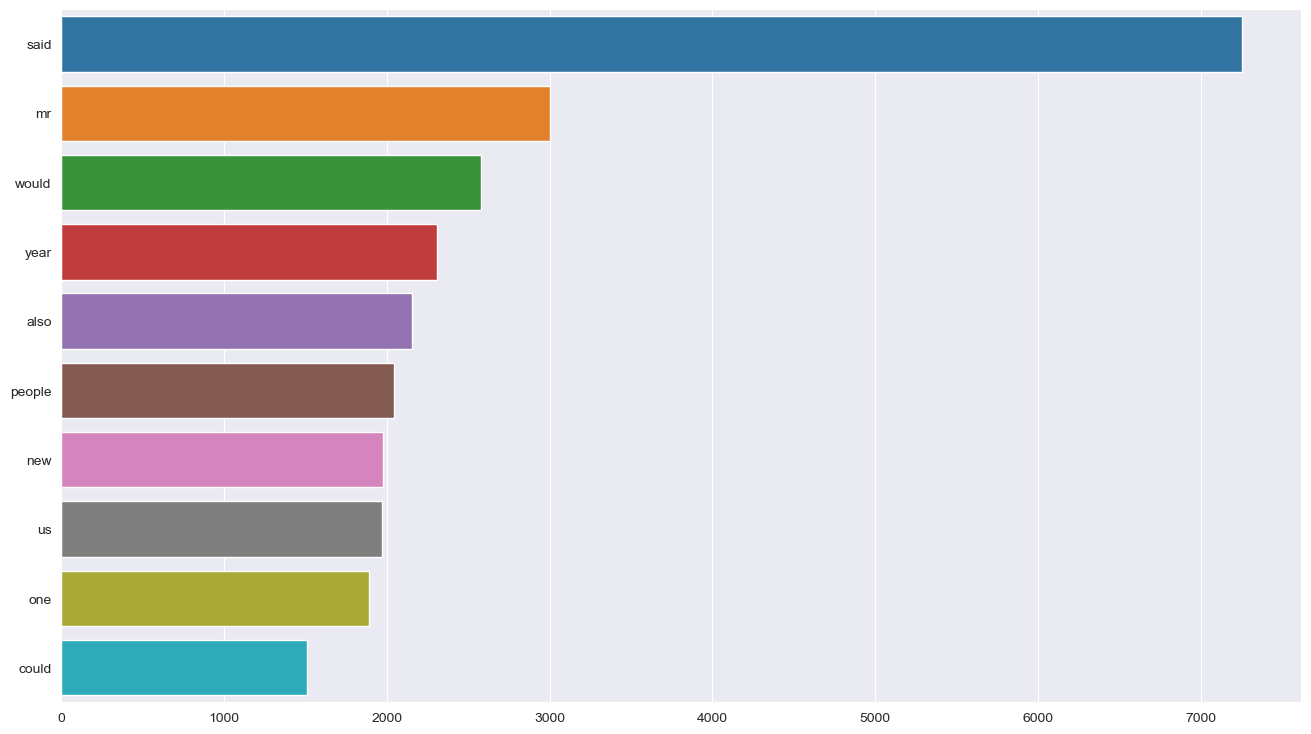

In [12]:
# Function to get the top text n-grams
def get_top_text_ngrams(corpus, n, g):
    cv = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_words = cv.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Create a bar plot of the top 10 unigrams
plt.figure(figsize=(16, 9))
most_common = get_top_text_ngrams(news_data['text'], 10, 1)
most_common = dict(most_common)
sns.barplot(x=list(most_common.values()), y=list(most_common.keys()))
plt.show()

In [13]:
# One-hot encode the 'category' column
category = pd.get_dummies(news_data['category'])

# Concatenate the original DataFrame with the dummy variables
new_cat = pd.concat([news_data, category], axis=1)

# Drop the original 'category' column
new_cat = new_cat.drop(columns='category')

# Display the first 10 rows of the modified DataFrame
new_cat.head(10)

,title,content,text,business,entertainment,politics,sport,tech
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit Quarterly pr...,True,False,False,False,False
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,Dollar gains Greenspan speech dollar hit highe...,True,False,False,False,False
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim owners embat...,True,False,False,False,False
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits British Airw...,True,False,False,False,False
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq Shares UK dr...,True,False,False,False,False
5,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...,Japan narrowly escapes recession Japan's econo...,True,False,False,False,False
6,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...,Jobs growth still slow US US created fewer job...,True,False,False,False,False
7,India calls for fair trade rules,"India, which attends the G7 meeting of seven ...","India calls fair trade rules India, attends G7...",True,False,False,False,False
8,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...,Ethiopia's crop production 24% Ethiopia produc...,True,False,False,False,False
9,Court rejects $280bn tobacco case,A US government claim accusing the country's ...,Court rejects $280bn tobacco case US governmen...,True,False,False,False,False


In [14]:
# Extract 'text' and 'category' columns
news = new_cat['text'].values
label = new_cat[['business', 'entertainment', 'politics', 'sport', 'tech']].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(news, label, test_size=0.2, shuffle=True)

# **Tokenizer Tensorflow**

In [15]:
# Import TensorFlow and necessary modules
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [16]:
# Set parameters for tokenization and padding
vocab_size = 10000
max_len = 200
trunc_type = "post"
oov_tok = "<OOV>"

# Create a Tokenizer with specified parameters
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Fit the Tokenizer on the training data
tokenizer.fit_on_texts(x_train)

# Get the word index from the Tokenizer
word_index = tokenizer.word_index

# Convert text data to sequences
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

# Pad sequences to a specified length
pad_train = pad_sequences(sequences_train, maxlen=max_len, truncating=trunc_type)
pad_test = pad_sequences(sequences_test, maxlen=max_len, truncating=trunc_type)

# Display the shape of the padded test data
print(pad_test.shape)

(445, 200)


In [17]:
# Display the padded training and testing data
print("Padded Training Data")
print(pad_train)

print("\nPadded Testing Data")
print(pad_test)


Padded Training Data
[[1064   98 9780 ...  192   37  990]
 [3286 2322 3534 ...  162  756    8]
 [ 199    1  295 ...   70 6528 1028]
 ...
 [   0    0    0 ...  669 2496 2080]
 [   0    0    0 ...  842 4179 3783]
 [   0    0    0 ...   54   63 1476]]

Padded Testing Data
[[2695 8077  274 ...  513 4701 2479]
 [   0    0    0 ...  203   21   20]
 [2053  805    1 ...   12  129 1884]
 ...
 [   0    0    0 ...    1    1 1256]
 [   0    0    0 ...   55    2  379]
 [  92  146 1177 ... 9649 9611  520]]


In [18]:
# Define the sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model with specified optimizer, metrics, and loss function
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# Display a summary of the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 755973 (2.88 MB)
Trainable params: 755973 (2.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Define a custom callback class
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Check if both training and validation accuracy are greater than 93%
        if(logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93):
            # Stop training if the condition is met
            self.model.stop_training = True
            print("\nAccuracy for both training set and the validation set has reached > 93%!")

# Instantiate an object of the custom callback class
callbacks = myCallback()

In [20]:
# Specify the number of epochs
num_epochs = 50

# Train the model with the provided data
history = model.fit(
    pad_train,
    y_train,
    epochs=num_epochs,
    validation_data=(pad_test, y_test),
    verbose=2,
    callbacks=[callbacks]
)


Epoch 1/50


56/56 - 7s - loss: 1.5747 - accuracy: 0.2848 - val_loss: 1.3843 - val_accuracy: 0.3730 - 7s/epoch - 126ms/step
Epoch 2/50
56/56 - 4s - loss: 1.1167 - accuracy: 0.4871 - val_loss: 0.9250 - val_accuracy: 0.6899 - 4s/epoch - 75ms/step
Epoch 3/50
56/56 - 5s - loss: 0.6566 - accuracy: 0.7573 - val_loss: 0.7068 - val_accuracy: 0.7191 - 5s/epoch - 86ms/step
Epoch 4/50
56/56 - 4s - loss: 0.2400 - accuracy: 0.9472 - val_loss: 0.7774 - val_accuracy: 0.7011 - 4s/epoch - 73ms/step
Epoch 5/50
56/56 - 4s - loss: 0.2190 - accuracy: 0.9410 - val_loss: 0.4858 - val_accuracy: 0.8562 - 4s/epoch - 73ms/step
Epoch 6/50
56/56 - 4s - loss: 0.0716 - accuracy: 0.9860 - val_loss: 0.3292 - val_accuracy: 0.8831 - 4s/epoch - 72ms/step
Epoch 7/50
56/56 - 4s - loss: 0.0095 - accuracy: 0.9989 - val_loss: 0.2813 - val_accuracy: 0.9146 - 4s/epoch - 73ms/step
Epoch 8/50

Accuracy for both training set and the validation set has reached > 93%!
56/56 - 4s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2866 -

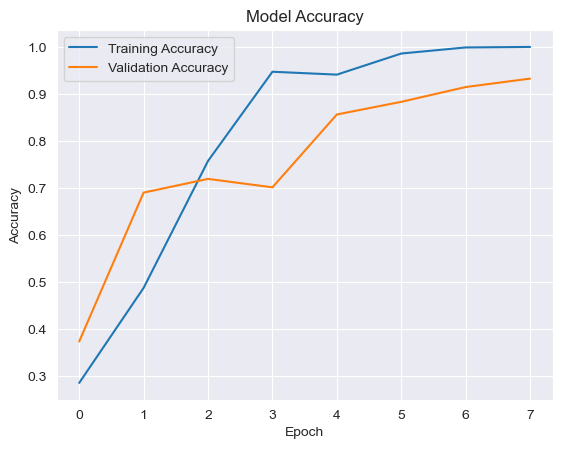

In [21]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

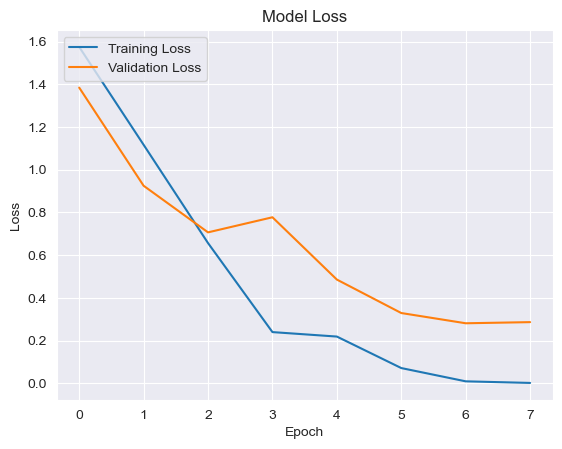

In [22]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()